## **Cargamos los datos limpios**

In [2]:
import pandas as pd
import os

# Cargamos el archivo de datos
processed_data_dir = '../data/processed'
file_name = 'ai_stocks_historical_data_cleaned.parquet' # <<<-- ¡Asegúrate de que incluya .parquet!
cleaned_parquet_filepath = os.path.join(processed_data_dir, file_name)

print(f"Intentando cargar desde la ruta: {cleaned_parquet_filepath}")
data_cleaned = pd.read_parquet(cleaned_parquet_filepath)

print("Datos limpios cargados exitosamente.")
data_cleaned.head()

Intentando cargar desde la ruta: ../data/processed\ai_stocks_historical_data_cleaned.parquet
Datos limpios cargados exitosamente.


Price           Close                                            High       \
Ticker           ARKQ BOTZ      GOOGL       MSFT      NVDA       ARKQ BOTZ   
Date                                                                         
2015-04-20  18.980328  NaN  27.096951  37.034481  0.532178  19.129559  NaN   
2015-04-21  19.008308  NaN  27.016832  36.801449  0.531456  19.026963  NaN   
2015-04-22  19.120234  NaN  27.328344  37.103531  0.537478  19.129561  NaN   
2015-04-23  19.259203  NaN  27.740372  37.405605  0.535310  19.260135  NaN   
2015-04-24  19.165934  NaN  28.546520  41.315315  0.530733  19.165934  NaN   

Price                                       ...       Open                  \
Ticker          GOOGL       MSFT      NVDA  ...       ARKQ BOTZ      GOOGL   
Date                                        ...                              
2015-04-20  27.160150  37.258879  0.540610  ...  19.129559  NaN  26.560516   
2015-04-21  27.258179  37.241618  0.538683  ...  19.026963  NaN  27.185526   
2015-04-22  27.418911  37.224361  0.538201  ...  18.915041  NaN  27.023801   
2015-04-23  27.924990  37.638636  0.540369  ...  19.073597  NaN  27.389550   
2015-04-24  29.095894  41.548345  0.535310  ...  19.165934  NaN  28.864500   

Price                           Volume                                       
Ticker           MSFT      NVDA   ARKQ BOTZ     GOOGL       MSFT       NVDA  
Date                                                                         
2015-04-20  36.016054  0.537238   1300  NaN  38508000   46057700  231624000  
2015-04-21  37.112156  0.538683   1200  NaN  29128000   26013800  230456000  
2015-04-22  36.827344  0.534588  35200  NaN  31806000   25064300  207420000  
2015-04-23  37.017222  0.527601   1300  NaN  78184000   46309500  259380000  
2015-04-24  39.407924  0.535069    200  NaN  92168000  130933700  240960000  

[5 rows x 25 columns]

## **Resumen Estádistico General**

In [ ]:
print("Resumen Estadístico de los Datos Financieros:")
print(data_cleaned.describe())

Resumen Estadístico de los Datos Financieros:
Price         Close                                                      \
Ticker         ARKQ         BOTZ        GOOGL         MSFT         NVDA   
count   2516.000000  2162.000000  2516.000000  2516.000000  2516.000000   
mean      44.172088    24.878226    86.670387   192.217335    24.341103   
std       20.506731     6.128568    45.324755   126.416651    36.441365   
min       13.634973    14.209198    26.626698    35.387402     0.467358   
25%       29.282805    20.009109    49.797050    71.362513     3.791205   
50%       39.460112    23.476933    70.352154   171.631699     7.213508   
75%       56.362500    30.164827   125.366381   287.059250    23.447338   
max       98.419113    39.605778   206.142593   464.854340   149.416245   

Price          High                                                      ...  \
Ticker         ARKQ         BOTZ        GOOGL         MSFT         NVDA  ...   
count   2516.000000  2162.000000  2516.0000

## **Estadísticas específicas por Ticker**

In [ ]:
# Precio de cierre promedio por ticker
print("\nPrecio de Cierre Promedio por Ticker:")
print(data_cleaned['Close'].mean())

# Desviación estándar del precio de cierre (volatilidad) por ticker
print("\nVolatilidad (Desviación Estándar del Precio de Cierre) por Ticker:")
print(data_cleaned['Close'].std())

# Volumen Promedio
print("\nVolumen Promedio por Ticker:")
print(data_cleaned['Volume'].mean())

print("\nVolatilidad (Desviación Estándar del Volumen) por Ticker:")
print(data_cleaned['Volume'].std())

# Mediana
print("\nMediana del Precio de Cierre por Ticker:")
print(data_cleaned['Close'].median())


Precio de Cierre Promedio por Ticker:
Ticker
ARKQ      44.172088
BOTZ      24.878226
GOOGL     86.670387
MSFT     192.217335
NVDA      24.341103
dtype: float64

Volatilidad (Desviación Estándar del Precio de Cierre) por Ticker:
Ticker
ARKQ      20.506731
BOTZ       6.128568
GOOGL     45.324755
MSFT     126.416651
NVDA      36.441365
dtype: float64

Volumen Promedio por Ticker:
Ticker
ARKQ     1.485437e+05
BOTZ     7.786618e+05
GOOGL    3.487975e+07
MSFT     2.848676e+07
NVDA     4.686734e+08
dtype: float64

Volatilidad (Desviación Estándar del Volumen) por Ticker:
Ticker
ARKQ     3.141138e+05
BOTZ     6.224137e+05
GOOGL    1.686716e+07
MSFT     1.295143e+07
NVDA     2.529852e+08
dtype: float64

Mediana del Precio de Cierre por Ticker:
Ticker
ARKQ      39.460112
BOTZ      23.476933
GOOGL     70.352154
MSFT     171.631699
NVDA       7.213508
dtype: float64


## **Rendimientos Diarios**

In [ ]:
import numpy as np 

# Rendimientos porcentuales simples
returns_simple = data_cleaned['Close'].pct_change().dropna()

print("Rendimientos Diarios Simples (primeras filas):")
print(returns_simple.head())
print("\nResumen estadístico de Rendimientos Diarios Simples:")
print(returns_simple.describe())


# Rendimientos logarítmicos, son aditivos en el tiempo (log(P_t / P_{t-1}) = log(P_t) - log(P_{t-1}))

log_returns = np.log(data_cleaned['Close'] / data_cleaned['Close'].shift(1)).dropna()

# log_returns = np.log(1 + returns_simple).dropna()

print("\nRendimientos Diarios Logarítmicos (primeras filas):")
print(log_returns.head())
print("\nResumen estadístico de Rendimientos Diarios Logarítmicos:")
print(log_returns.describe())

Rendimientos Diarios Simples (primeras filas):
Ticker          ARKQ      BOTZ     GOOGL      MSFT      NVDA
Date                                                        
2016-09-14  0.002609  0.000000  0.002206 -0.004776  0.008853
2016-09-15  0.017108  0.000000  0.013625  0.016531  0.037914
2016-09-16  0.001658 -0.004065 -0.004069  0.001049  0.002393
2016-09-19  0.010880  0.009524 -0.003233 -0.005590  0.013208
2016-09-20 -0.007019  0.008760  0.005519 -0.002108 -0.009110

Resumen estadístico de Rendimientos Diarios Simples:
Ticker         ARKQ         BOTZ        GOOGL         MSFT         NVDA
count   2161.000000  2161.000000  2161.000000  2161.000000  2161.000000
mean       0.000731     0.000423     0.000795     0.001066     0.002491
std        0.018737     0.016347     0.018461     0.017275     0.032725
min       -0.104394    -0.124058    -0.116342    -0.147390    -0.187559
25%       -0.009607    -0.007541    -0.007878    -0.006807    -0.014481
50%        0.001299     0.000905     0.0

## **Distribución de Rendimientos**


Visualizando histograma de Rendimientos Diarios Simples...


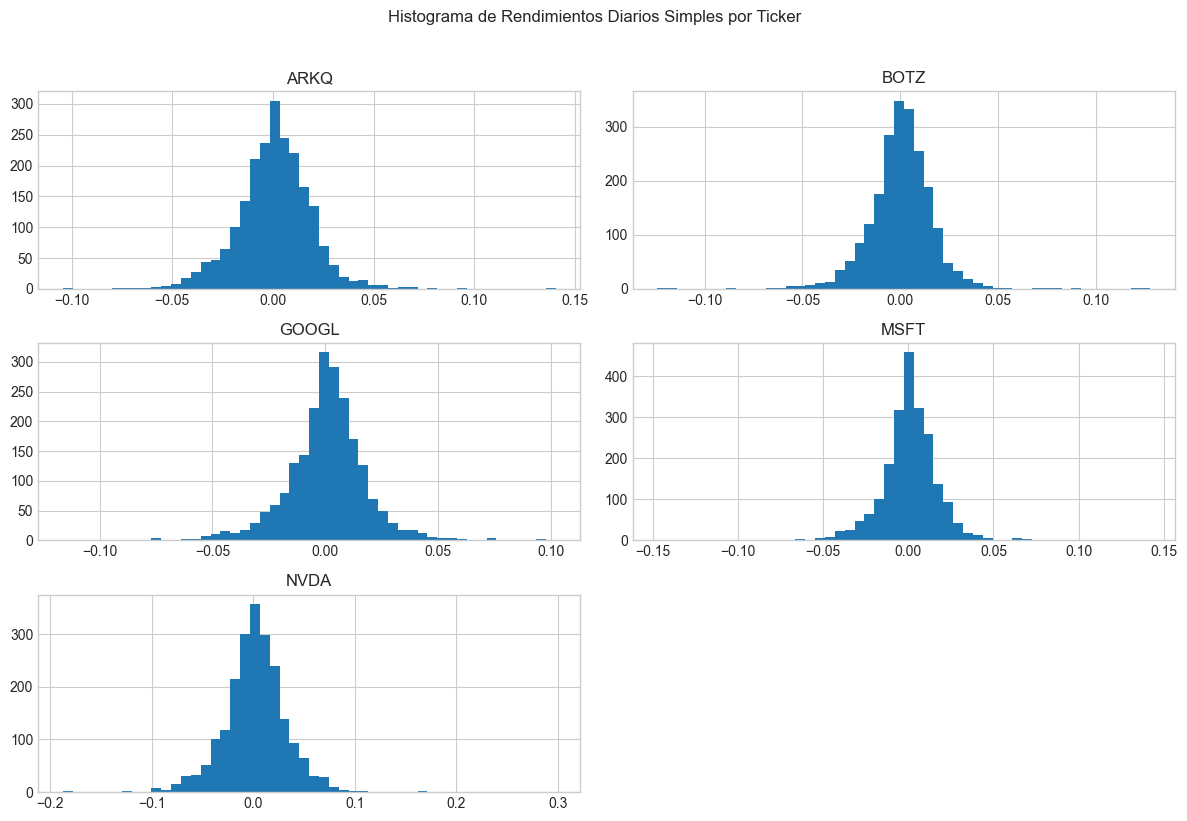


Visualizando histograma de Rendimientos Diarios Logarítmicos...


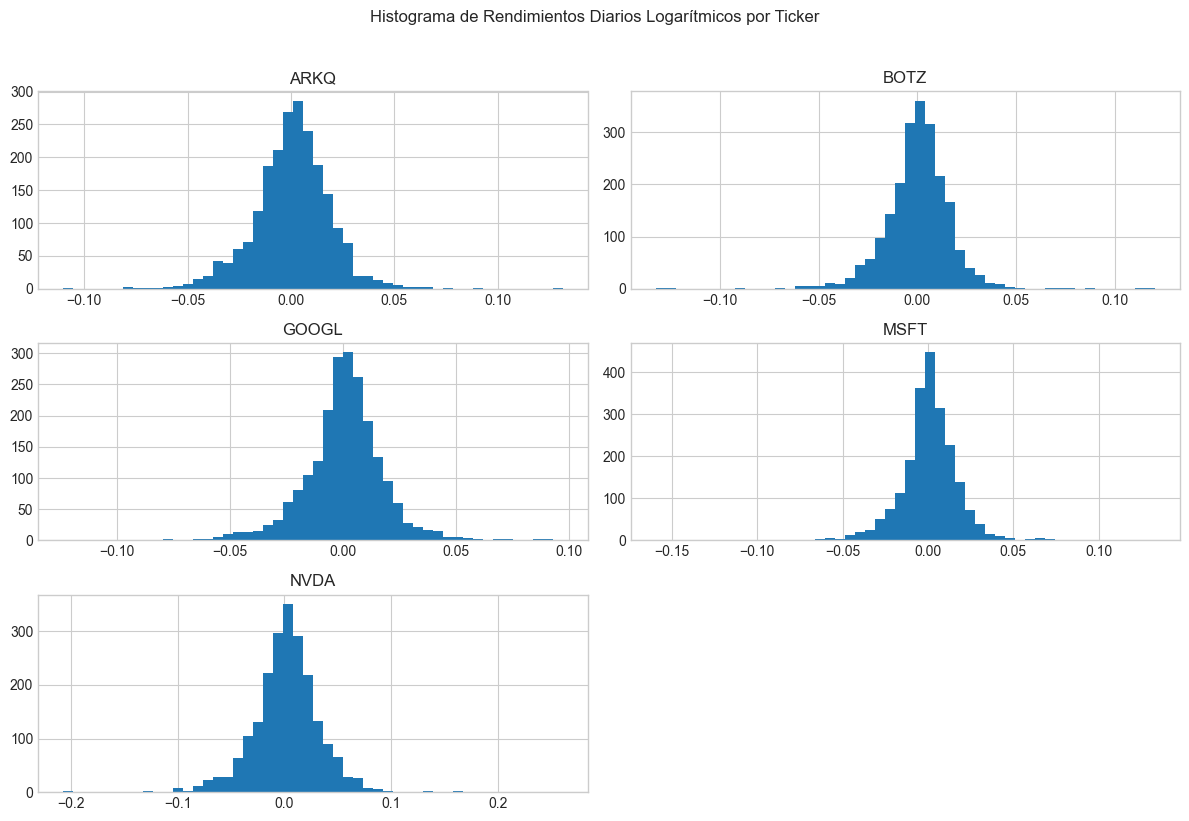

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns # pip install seaborn si no lo tienes

# Configurar el estilo de los gráficos
plt.style.use('seaborn-v0_8-whitegrid')

# --- Visualizar Histograma de Rendimientos Simples ---
print("\nVisualizando histograma de Rendimientos Diarios Simples...")
# Usamos bins para controlar el número de "barras" en el histograma
# Usamos figsize para controlar el tamaño del gráfico
# Puedes ajustar bins y figsize a tu gusto
returns_simple.hist(bins=50, figsize=(12, 8))

# Añadir título general al conjunto de sub-gráficos (uno por ticker)
plt.suptitle('Histograma de Rendimientos Diarios Simples por Ticker', y=1.02)

# Ajustar el layout para evitar que los títulos se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# --- Visualizar Histograma de Rendimientos Logarítmicos (opcional, similar al simple) ---
print("\nVisualizando histograma de Rendimientos Diarios Logarítmicos...")
log_returns.hist(bins=50, figsize=(12, 8))
plt.suptitle('Histograma de Rendimientos Diarios Logarítmicos por Ticker', y=1.02)
plt.tight_layout()
plt.show()

## *Confirmación de Fechas*

In [6]:
# Verificar el rango de fechas del DataFrame
print("\nRango de Fechas de los Datos Cargados:")
print(f"Primer Fecha: {data_cleaned.index.min()}")
print(f"Última Fecha: {data_cleaned.index.max()}")


Rango de Fechas de los Datos Cargados:
Primer Fecha: 2015-04-20 00:00:00
Última Fecha: 2025-04-17 00:00:00
